In [52]:
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [53]:
df=sns.load_dataset('titanic')

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [55]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [56]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [57]:
df['sex'] = df['sex'].map({'male': 0, 'female': 1})

In [58]:
df['embarked'] = df['embarked'].map({'S': 0, 'C': 1,'Q': 2})

In [59]:
df['alone'] = df['alone'].astype(int)

In [60]:
features = ['sex', 'age','fare']

In [61]:
df['age'] = df['age'].fillna(df['age'].median())
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])

In [62]:
X = df[features]
Y = df['survived']

In [63]:
# 7. Créer et entraîner le modèle Decision Tree
model = DecisionTreeClassifier(random_state=42,max_depth=3)
model.fit(X, Y)

,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


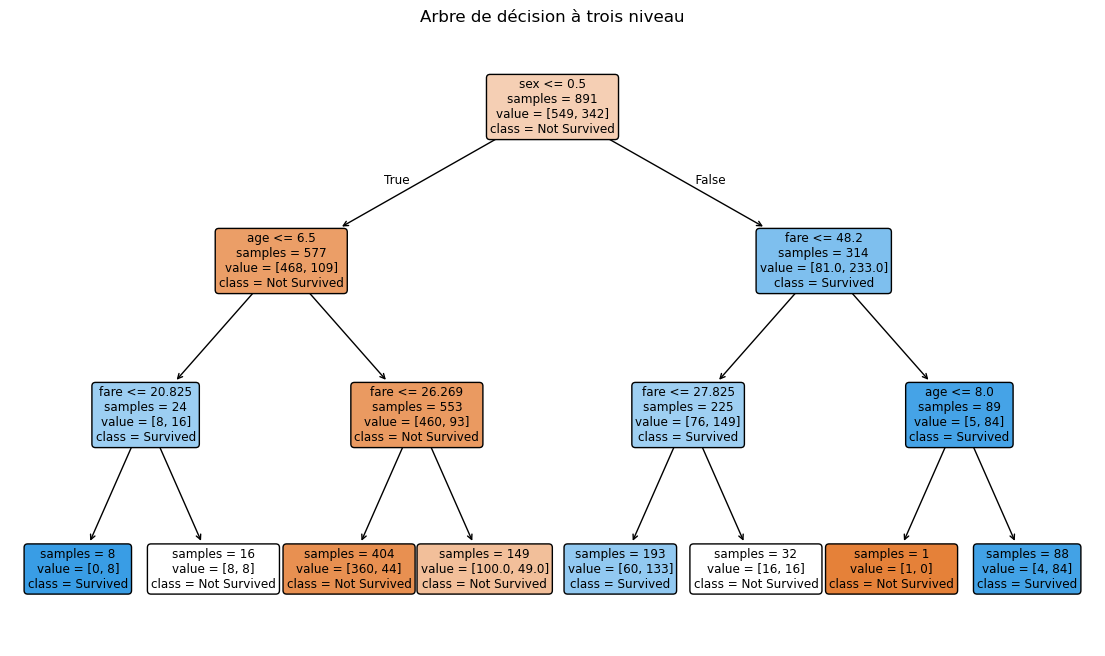

In [64]:
plt.figure(figsize=(14,8))
tree.plot_tree(
    model,feature_names=X.columns,
    class_names=['Not Survived','Survived'],
    filled=True, rounded=True, impurity=False)
plt.title("Arbre de décision à trois niveau")
plt.show()


In [65]:
import numpy as np

tab1 = [1, 6, 140]

# transformer en DataFrame avec les noms de colonnes EXACTS
P =np.array([tab1])

predi = model.predict(P)

classes = ['Akufi', 'Akufi te']
print("Par rapport aux infos que tu as données, mutu nayo : ", classes[predi[0]])

Par rapport aux infos que tu as données, mutu nayo :  Akufi


C:\Users\USER\anaconda3\envs\MBUYAMBA\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [66]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
# Normalisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
model2 = SVC(kernel='rbf', C=1, gamma='scale',probability=True, random_state=42)
model2.fit(X_scaled,Y)

,C,1
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,True
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [67]:
#Tester les valeurs saisies au clavier 
import numpy as np
P1=np.array([[2, 21, 280]]) #On saisie les valeurs à prédire au clavier 
P_N=scaler.fit_transform(P)
classes = ['Akufi', 'Akufi te'] #
predi = model2.predict(P_N)
#Affichage de la classe de prédiction
print("Par rapport aux infos que tu as données, mutu nayo : ",classes[predi[0]])

Par rapport aux infos que tu as données, mutu nayo :  Akufi


In [68]:
import joblib
joblib.dump(model2, "model2.pkl")

['model2.pkl']

In [69]:
x = df[['sex', 'age','fare']]
y = df['survived']

In [70]:
model = DecisionTreeClassifier(random_state=42, max_depth=3)
model.fit(X, y)

,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [71]:
Exe1 = [0,19,100]
p = np.array([Exe1])
Predi = model.predict(p)
classes = ['Akufi', 'Akufi te']
print("Par rapport aux infos que tu as données, mutu nayo : ", classes[predi[0]])

Par rapport aux infos que tu as données, mutu nayo :  Akufi


C:\Users\USER\anaconda3\envs\MBUYAMBA\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [72]:

scaler = StandardScaler()
X_S = scaler.fit_transform(x)
model1 = KNeighborsClassifier(n_neighbors=5)
model1.fit(X_S,y)


,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [73]:
Exe1 = [0,19,100]
p = np.array([Exe1])
Predi = model1.predict(p)
classes = ['Akufi', 'Akufi te']
print("Par rapport aux infos que tu as données, mutu nayo : ", classes[predi[0]])

Par rapport aux infos que tu as données, mutu nayo :  Akufi


In [74]:
from sklearn.tree import DecisionTreeClassifier 

model = DecisionTreeClassifier ( random_state = 42, max_depth=3)
model.fit(x,y)

In [75]:
Exe2 = [0,19,100]
p = np.array([Exe2])
Predi = model.predict(p)
classes = ['Akufi', 'Akufi te']
print("Par rapport aux infos que tu as données, mutu nayo : ", classes[predi[0]])

Par rapport aux infos que tu as données, mutu nayo :  Akufi


C:\Users\USER\anaconda3\envs\MBUYAMBA\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [76]:
model4 = GaussianNB()
model4.fit(X_S, y)

,priors,None
,var_smoothing,1e-09


In [77]:
Exe2 = [0,19,100]
p = np.array([Exe2])
Predi = model4.predict(p)
classes = ['Akufi', 'Akufi te']
print("Par rapport aux infos que tu as données, mutu nayo : ", classes[predi[0]])

Par rapport aux infos que tu as données, mutu nayo :  Akufi


In [78]:
model5 = GradientBoostingClassifier()
model5.fit(X_S, y)

,loss,'log_loss'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [79]:
Exe2 = [0,19,100]
p = np.array([Exe2])
Predi = model5.predict(p)
classes = ['Akufi', 'Akufi te']
print("Par rapport aux infos que tu as données, mutu nayo : ", classes[predi[0]])

Par rapport aux infos que tu as données, mutu nayo :  Akufi
